In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hearing_test.csv")

## Introduction

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

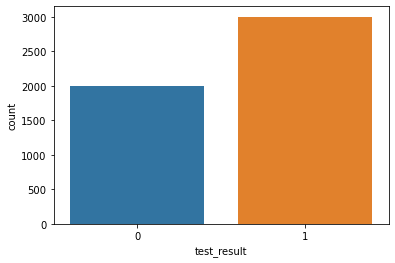

In [6]:
sns.countplot(data=df, x="test_result");

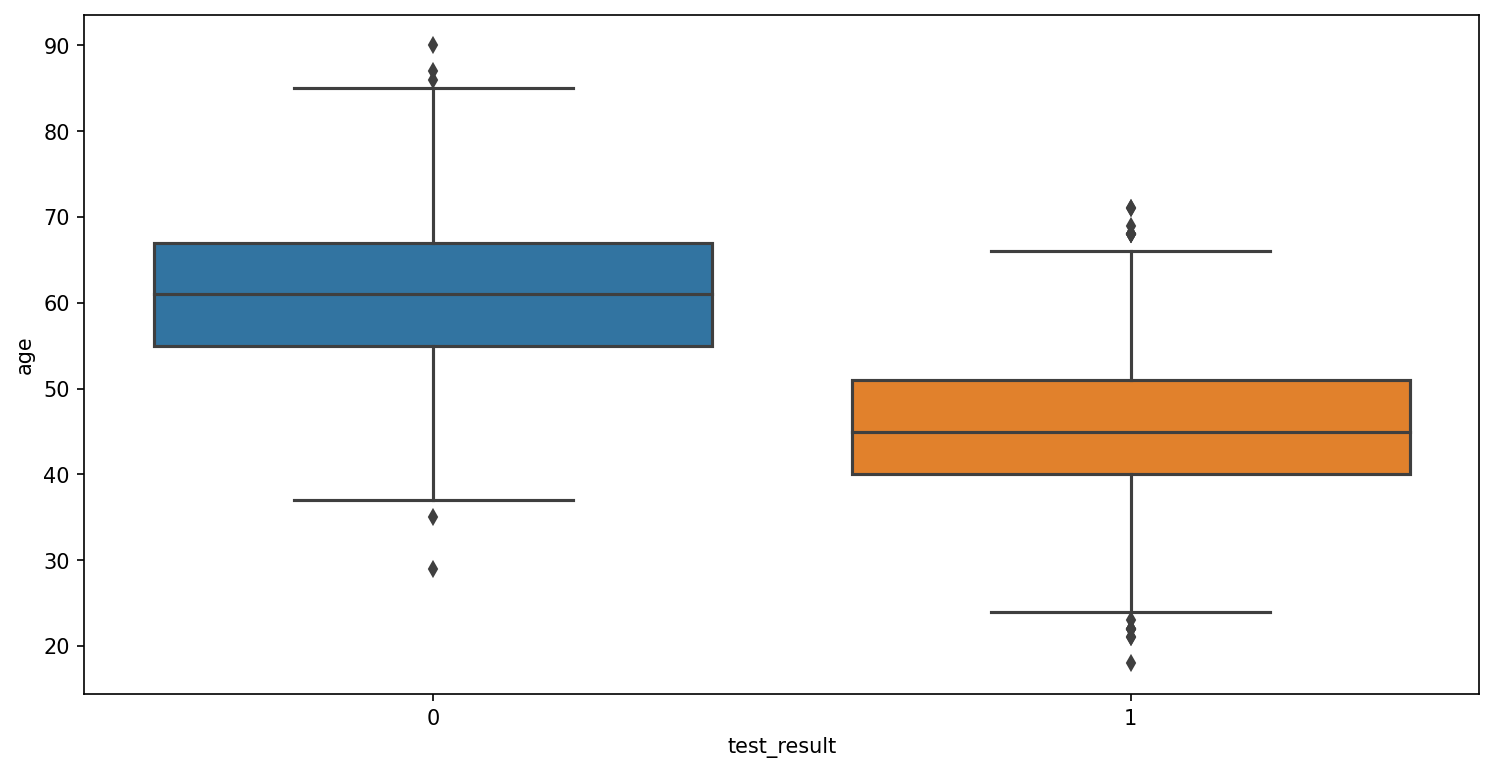

In [7]:
plt.figure(figsize=(12,6), dpi=150)
sns.boxplot(data=df, x="test_result", y="age");

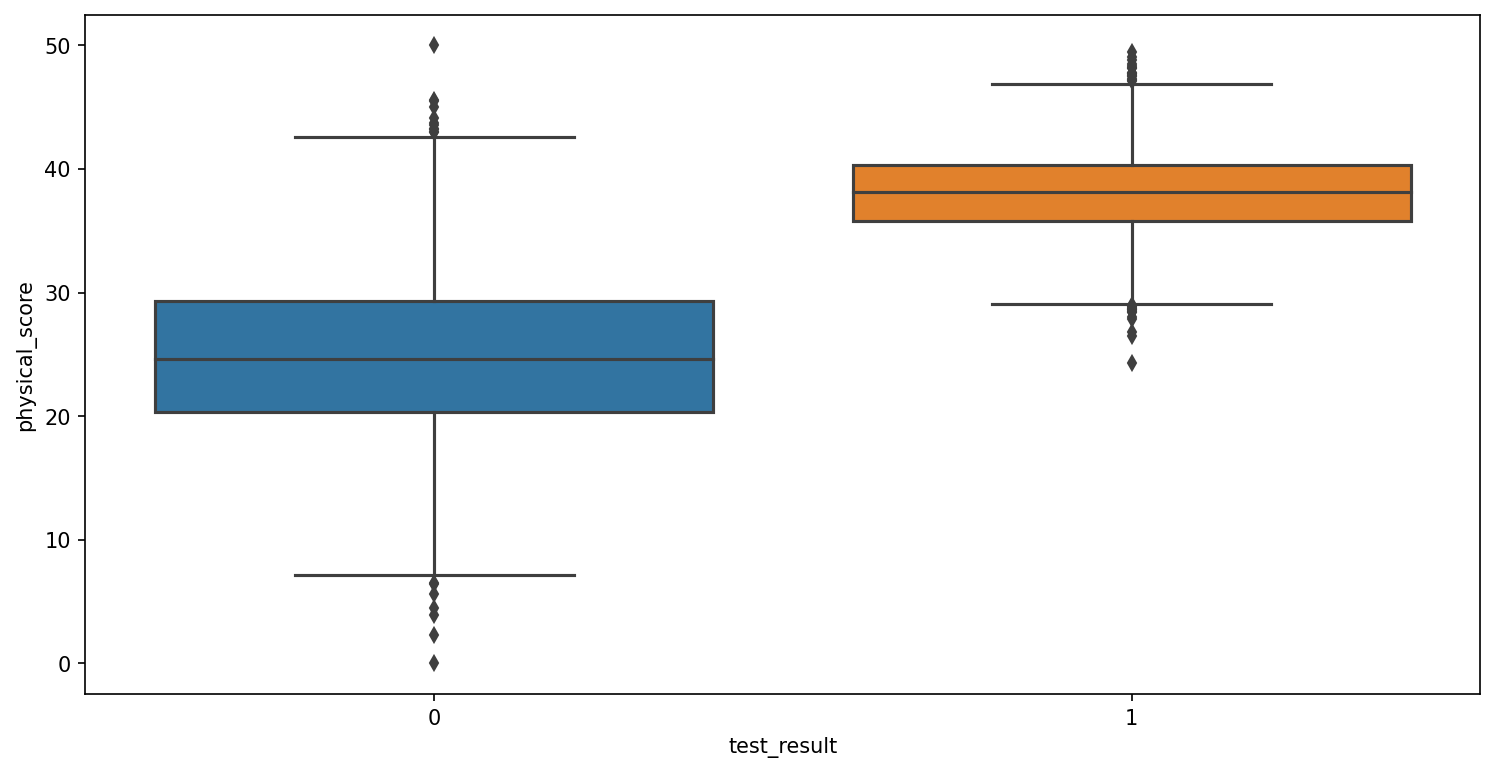

In [8]:
plt.figure(figsize=(12,6), dpi=150)
sns.boxplot(data=df, x="test_result", y="physical_score");

<AxesSubplot:xlabel='age', ylabel='physical_score'>

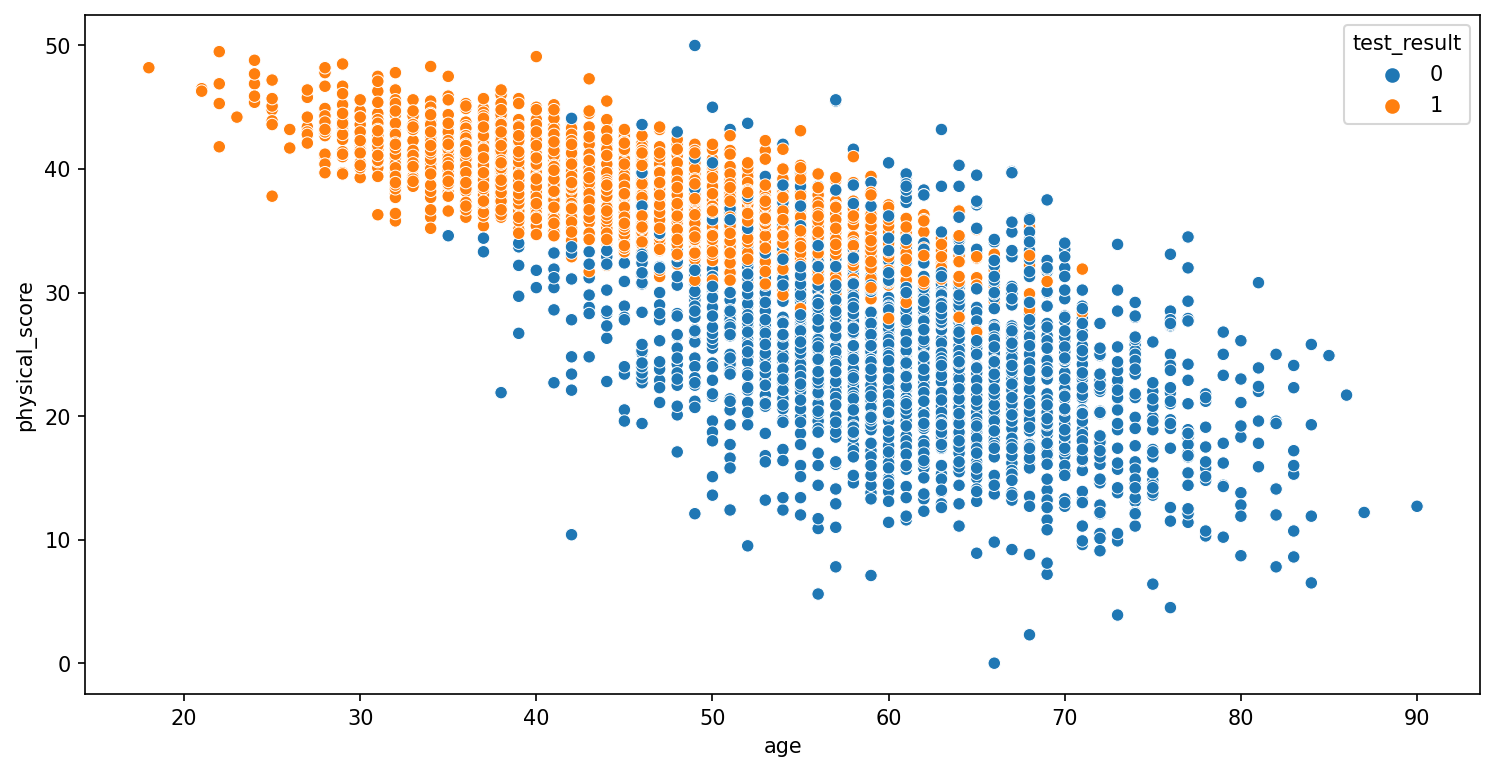

In [9]:
plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(data=df, x="age", y="physical_score", hue="test_result")

<Figure size 1600x1600 with 0 Axes>

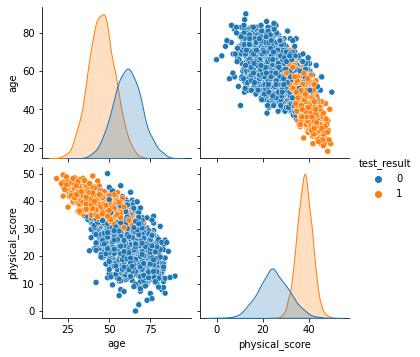

In [10]:
plt.figure(figsize=(8,8), dpi=200)
sns.pairplot(df,hue="test_result");

<AxesSubplot:>

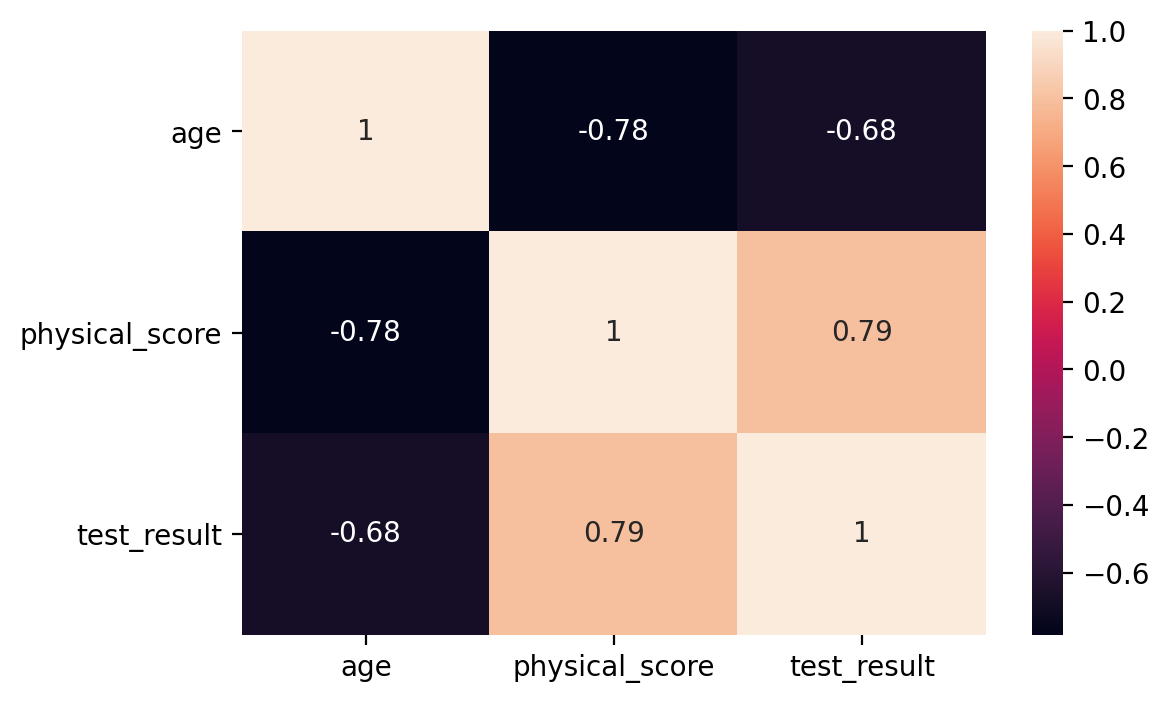

In [11]:
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

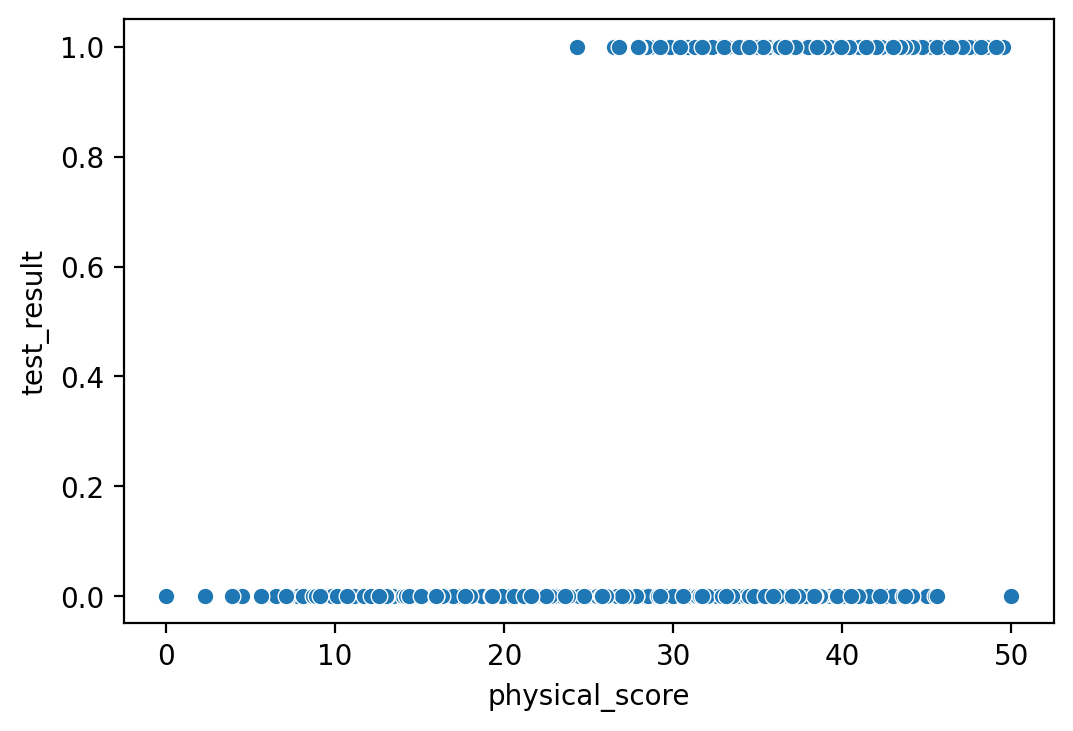

In [12]:
plt.figure(figsize=(6,4), dpi=200)
sns.scatterplot(x="physical_score",y="test_result",data=df)

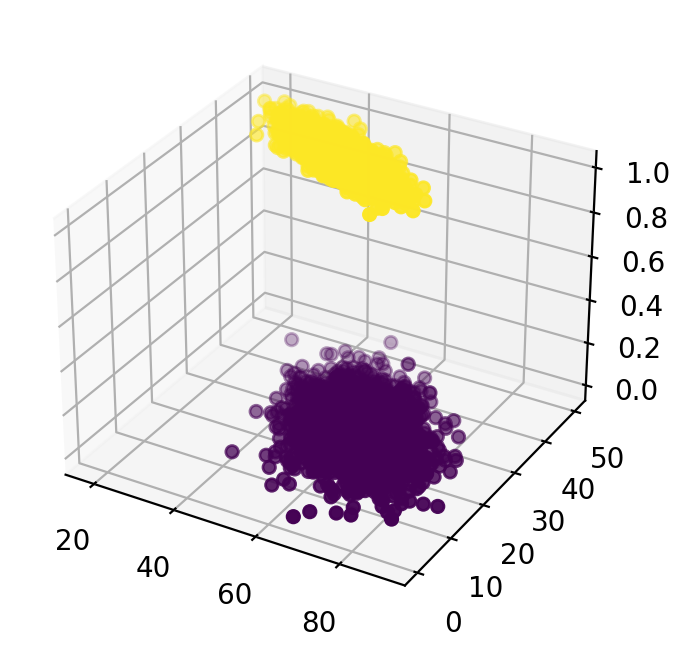

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,4), dpi=200)
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["age"],df["physical_score"],df["test_result"],c=df["test_result"])

## Train Test Split

In [14]:
X = df.drop("test_result", axis=1)
y = df["test_result"]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [17]:
scaler= StandardScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)

In [19]:
scaled_X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_model = LogisticRegression()

In [22]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [23]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [24]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

## Performance Evaluation

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [27]:
accuracy_score(y_test,y_pred)

0.93

In [28]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [29]:
from sklearn.metrics import plot_confusion_matrix

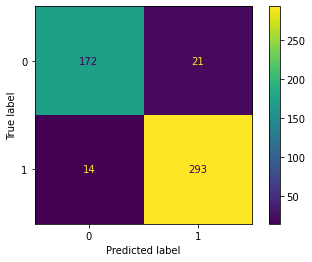

In [30]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

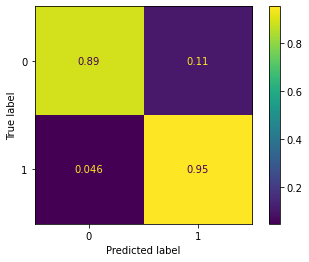

In [31]:
plot_confusion_matrix(log_model, scaled_X_test, y_test, normalize="true")

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [34]:
from sklearn.metrics import precision_score, recall_score

In [35]:
precision_score(y_test,y_pred)

0.9331210191082803

In [36]:
recall_score(y_test,y_pred)

0.9543973941368078

In [37]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

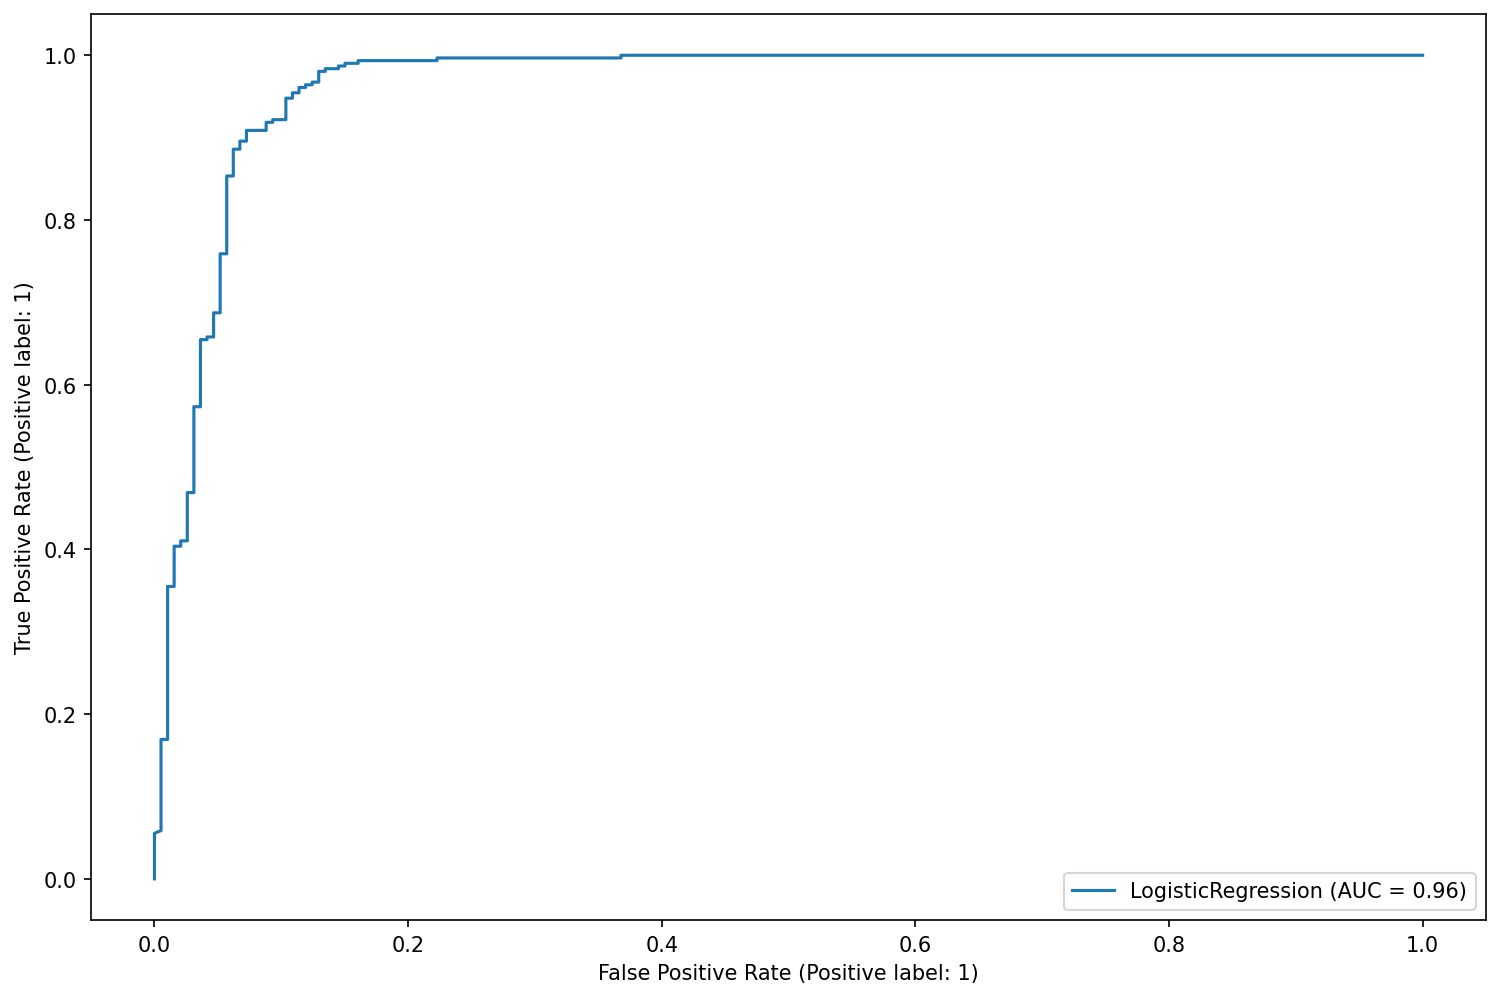

In [40]:
fig,ax = plt.subplots(figsize=(12,8),dpi=150)
plot_roc_curve(log_model,scaled_X_test,y_test, ax=ax)

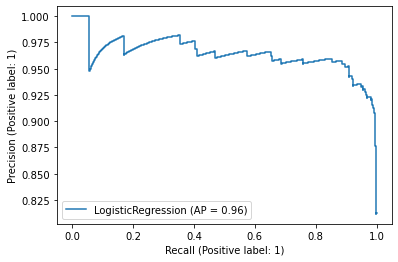

In [41]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

In [42]:
log_model.predict_proba(scaled_X_test[0:10])

array([[0.02384343, 0.97615657],
       [0.02692408, 0.97307592],
       [0.98919417, 0.01080583],
       [0.00190769, 0.99809231],
       [0.97501262, 0.02498738],
       [0.9896525 , 0.0103475 ],
       [0.07402267, 0.92597733],
       [0.01709433, 0.98290567],
       [0.99706603, 0.00293397],
       [0.03305216, 0.96694784]])

In [43]:
y_test[0:10]

1718    1
2511    1
345     0
2521    1
54      0
2866    0
2371    0
2952    1
45      0
4653    1
Name: test_result, dtype: int64